# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

**Steps to follow in this excersise-**
- 1. Reading, understanding, pre-procesing (i.e remove blank rows/columns, add new columns etc.) and visualising the data
- 2. Preparing the data for modeling (i.e train-test split, scaling, dummy variable creation, mapping etc.)
- 3. Train the model
- 4. Resudual Analysis on trainng data
- 5. Prediction and evaluation of model on test data set

## Step 1: Read, understand and visualise the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [187]:
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [84]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [85]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [86]:
type(housing.isnull().sum())

pandas.core.series.Series

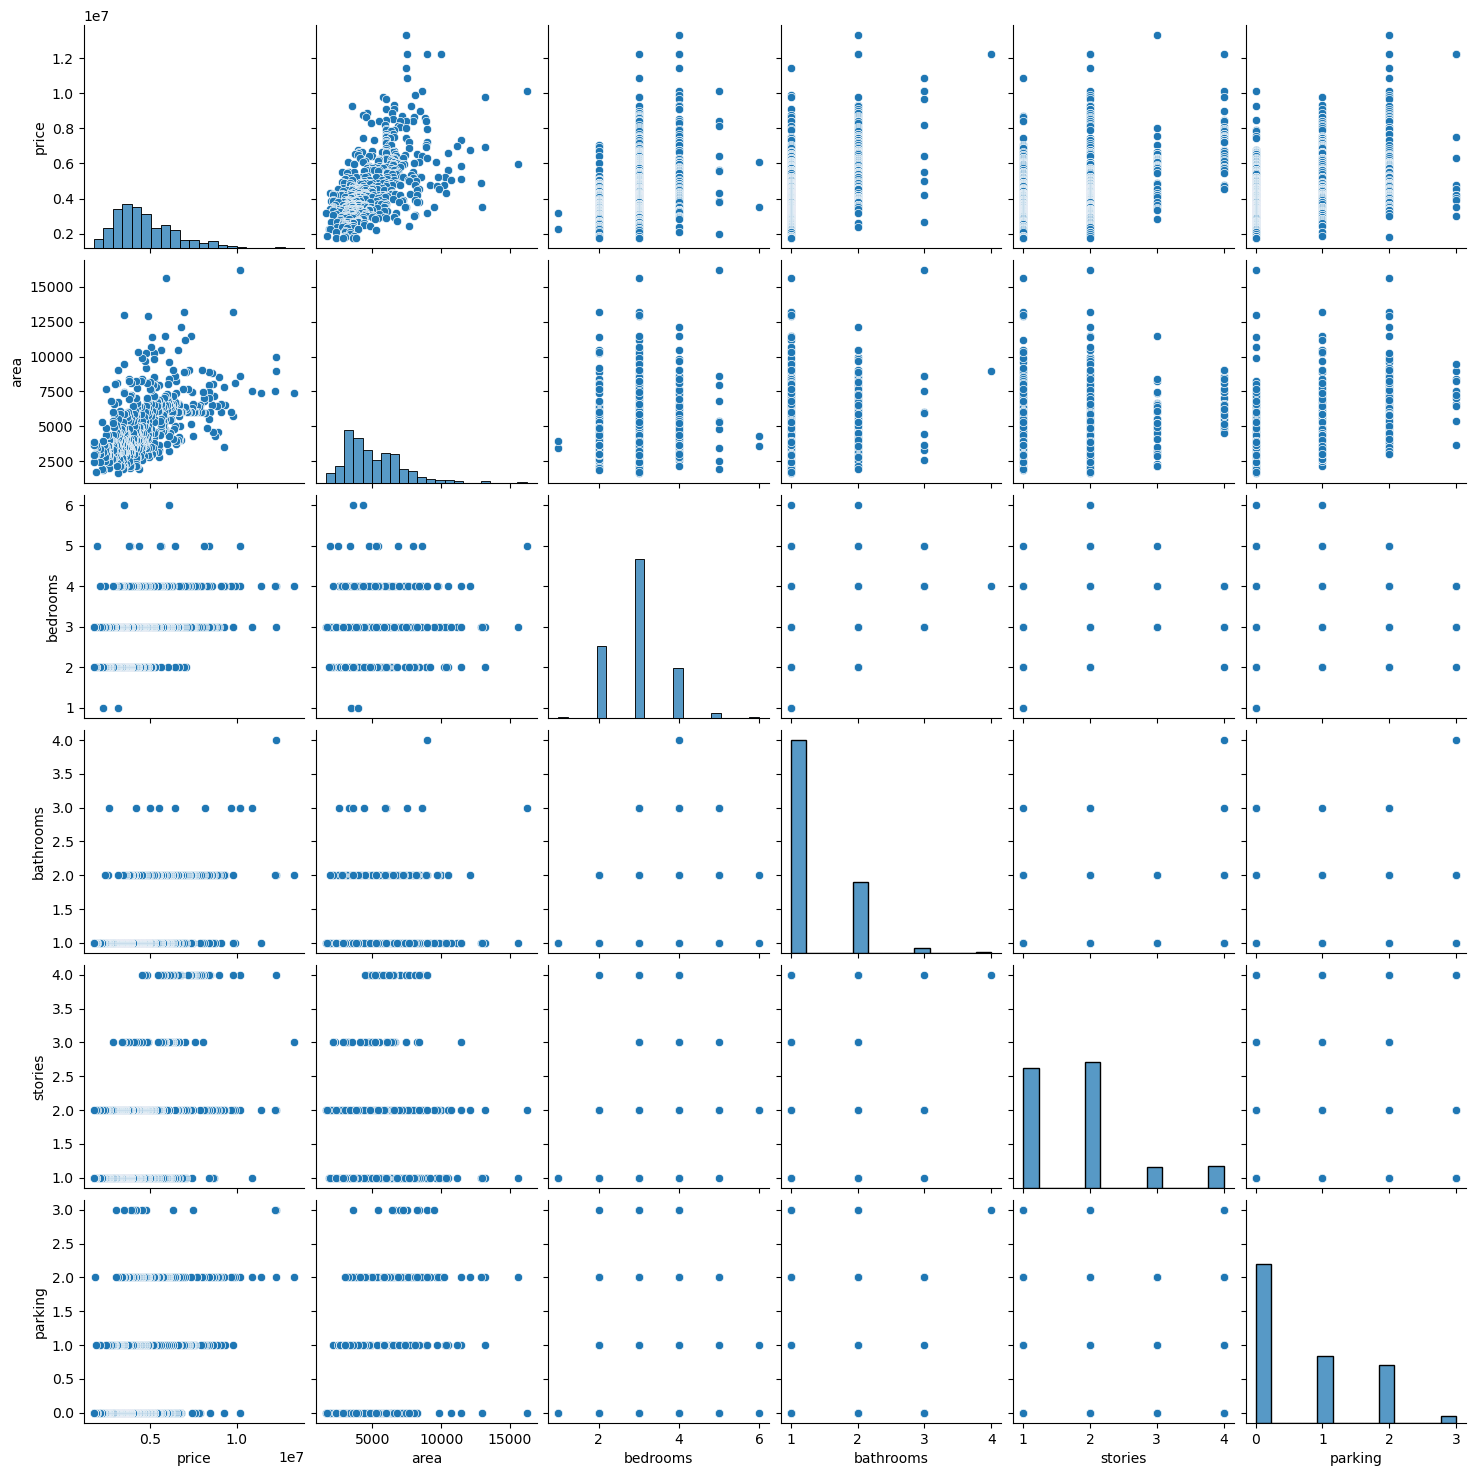

In [87]:
sns.pairplot(housing)
plt.show()

##### From above pairplot visualization we can say that we can create **Linear Regression** model for this dataset since for some 
##### features (like- area etc.) price is linearly associated 

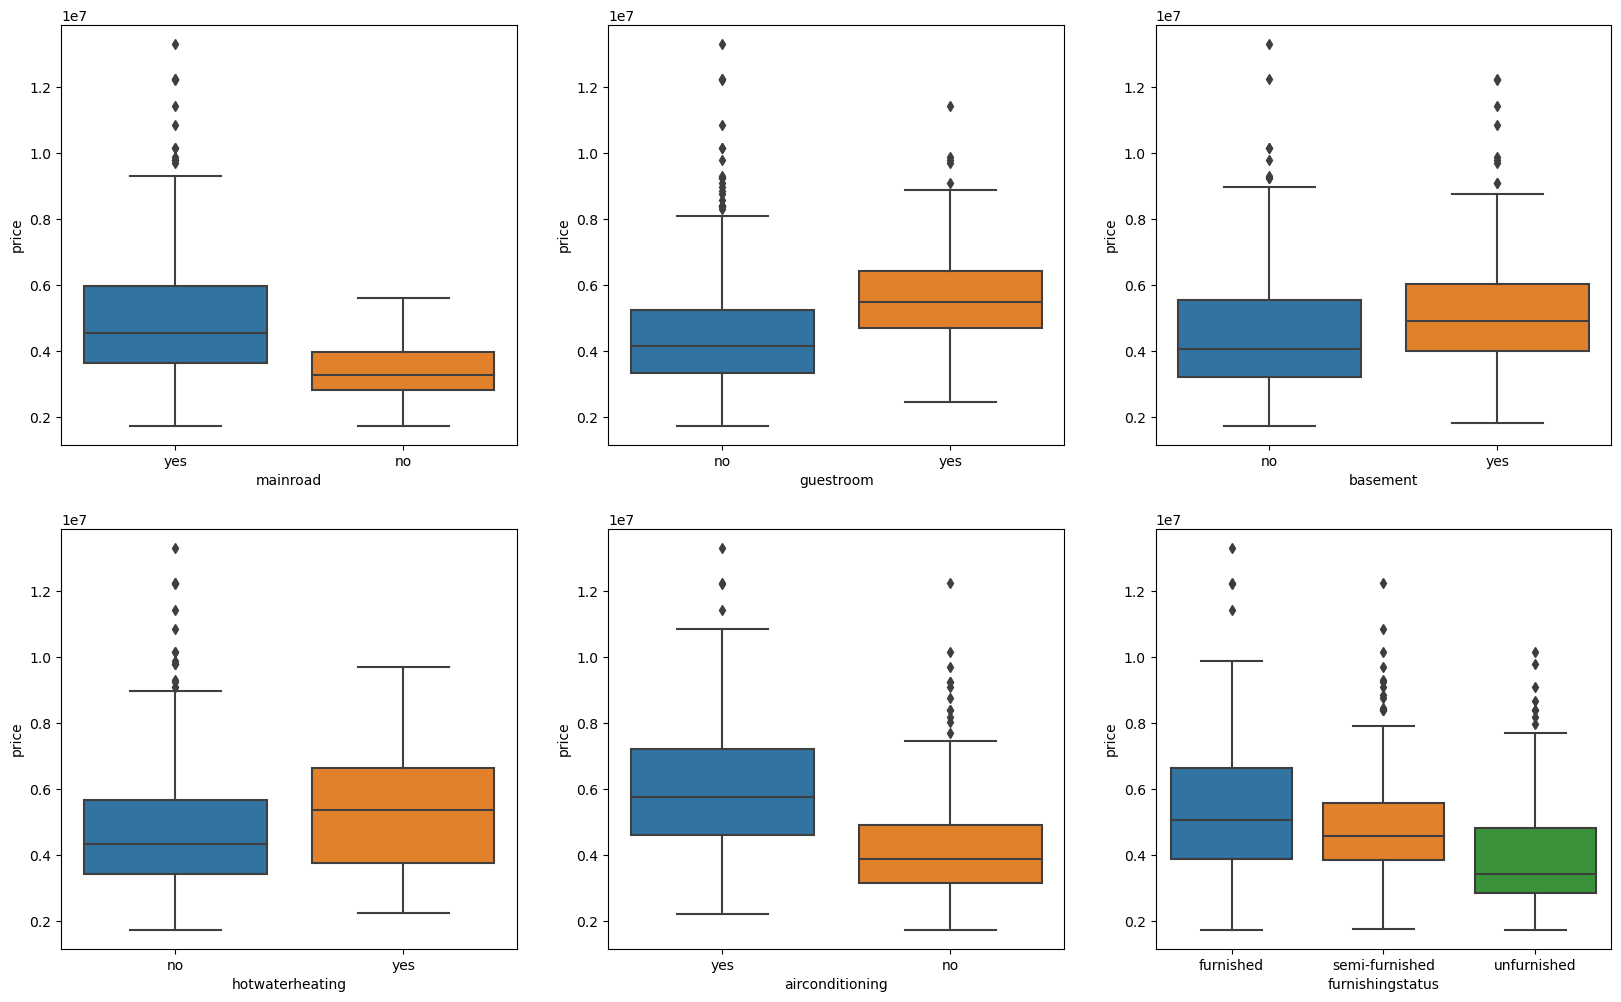

In [88]:
# Visualising the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

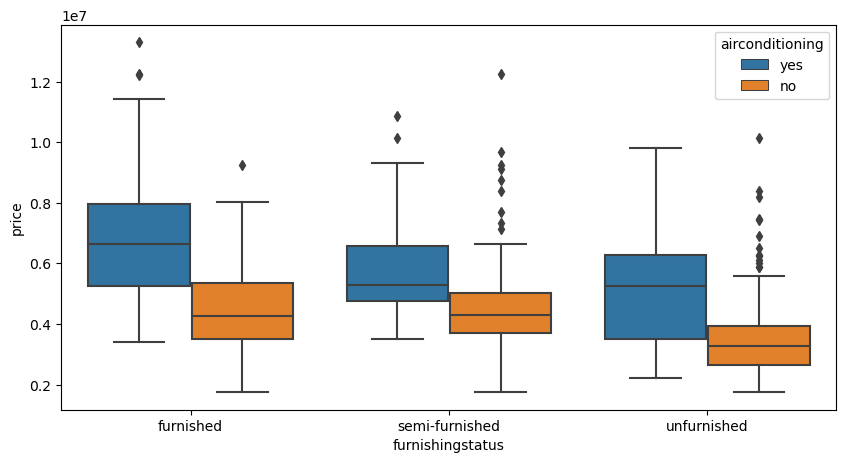

In [89]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

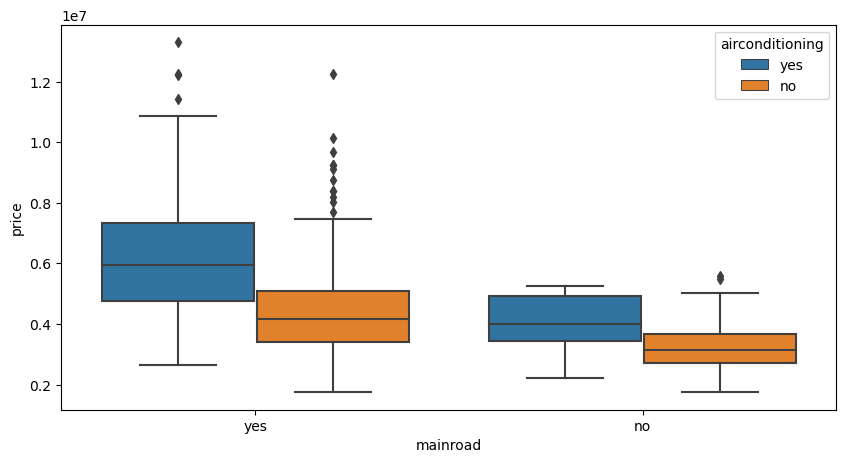

In [90]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mainroad', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

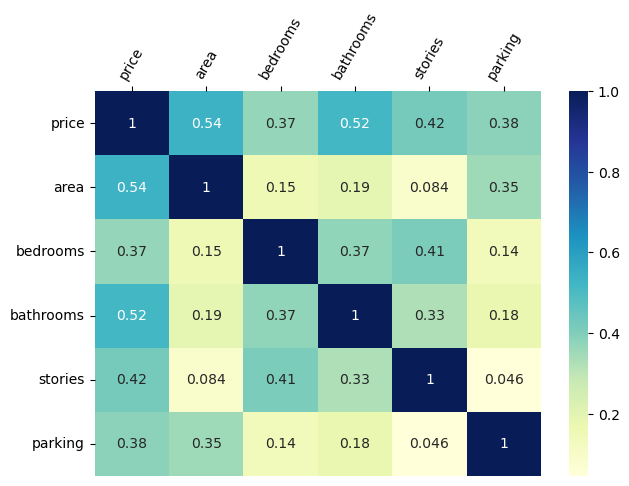

In [91]:
plt.figure(figsize=(7.2, 5))
ax= sns.heatmap(housing.corr(), cmap='YlGnBu', annot=True)
ax.xaxis.tick_top()
plt.xticks(rotation=60)
plt.show()

## Step 2 : Preparing the data for modeling
 - **2.1 Encoding**:
      - encode binary/boolean vars to 1 and 0
      - encode other categorical vars to dummy vars
 - **2.2 Spliting into train and test sets**
 - **2.3 Rescaling of variables**
      - comparaing among features coeffiencients will be relatistic
      - compution time for gradient descent method will less

In [240]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    uint8
 13  unfurnished      545 non-null    uint8
dtypes: int64(12), uint8(2)
memory usage: 52.3 KB


In [188]:
# encoding binary variable to 1 and 0
bool_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']
housing[bool_vars]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [189]:
def map_vars(var):
    return var.str.lower().map({'yes':1, 'no': 0})

In [190]:
map_vars(pd.Series(['Yes', 'No', 'yEs', 'nO']))

0    1
1    0
2    1
3    0
dtype: int64

In [191]:
is_bool_vars_encoded = False

In [198]:
print(is_bool_vars_encoded)

True


In [197]:
if not is_bool_vars_encoded:
    housing[bool_vars] = housing[bool_vars].apply(lambda x: x.str.upper().map({'YES': 1,  'NO': 0}))
    is_bool_vars_encoded = True
    
housing[bool_vars]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [202]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Create Dummy variables

In [204]:
fur_status = pd.get_dummies(housing['furnishingstatus'])
fur_status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [205]:
fur_status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
fur_status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [207]:
housing = pd.concat([housing, fur_status], axis=1)
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [208]:
housing= housing.drop('furnishingstatus', axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### 2.2 Splitting into train and test sets

In [249]:
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)

In [250]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### 1. Scaling should be done after the test-train split
- **Feedback:**
Correct! Scaling should always be done after the test-train split since you don't want the test dataset to learn anything from the train data. So if you're performing the test-train split earlier, the test data will then have information regarding the data like the minimum and maximum values, etc.

### 2. Standardised scaling will affect the values of dummy variables but MinMax scaling will not
- **Feedback:**
MinMax scaling scales in such a way that all the values lie between 0 and 1 using the formula:

 **(X-Xmin)/(Xmax-Xmin)**

So if you have dummy variables, which can only take the values 0 and 1, you can notice that for the case of zero, the variable remains zero and for the case of 1, the variable remains 1.

On the other hand, the standard scaler scales in such a way that the mean of the dataset becomes zero and standard deviation becomes one. So this will clearly distort the values of the dummy variables since some of the variables will become negative.

### 2.3 Scaling of features

In [251]:
# normalisation: min-max scaling  ex- (X- Xmin)/ (Xmax-Xmin) => (0, 1)
# standardrisation: (mean = 0 , std. div = 1)  (X- Xmean)/std_div(X)

In [252]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [253]:
# MinMaxScaler class the three static methods:
# 1. fit()- learns min and max values
# 2. transform() : calculate (X- Xmin)/ (Xmax-Xmin)
# 3. fit_transform(): lean min, max and calcualte value

In [254]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [256]:
# 1. Initiate the object
scaler = MinMaxScaler()

scale_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


# 2. fit the data
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [258]:
df_train[scale_vars].describe()

,price,area,bedrooms,bathrooms,stories,parking
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.242345
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.285933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
pip install docx


     -------------------------------------- 54.9/54.9 kB 190.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53897 sha256=26de0072370540f3d97358bb8183293dbe3be49d359638714b7be3ec10cb40f8
  Stored in directory: c:\users\window 10\appdata\local\pip\cache\wheels\0f\8e\9d\7003eed35a84cf960876aae6bdf60d02041ddfcca66eceee94
Successfully built docx


In [231]:
import docx

visualise_scaling_of_data = docx.Document('Visualisation of scaling of data.docx')
len(visualise_scaling_of_data.paragraphs)

1

In [232]:
 visualise_scaling_of_data.paragraphs[0].text

''

In [227]:
pip install python-docx

     ---------------------------------------- 5.6/5.6 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184489 sha256=e9eda06d850f38a7beaaed5367418890ebb15a99969eb9b3fec61bda71f635ed
  Stored in directory: c:\users\window 10\appdata\local\pip\cache\wheels\83\8b\7c\09ae60c42c7ba4ed2dddaf2b8b9186cb105255856d6ed3dba5
Successfully built python-docx
Note: you may need to restart the kernel to use updated packages.


In [230]:
import docx

visualise_scaling_of_data = docx.Document('test.docx')
len(visualise_scaling_of_data.paragraphs)

8

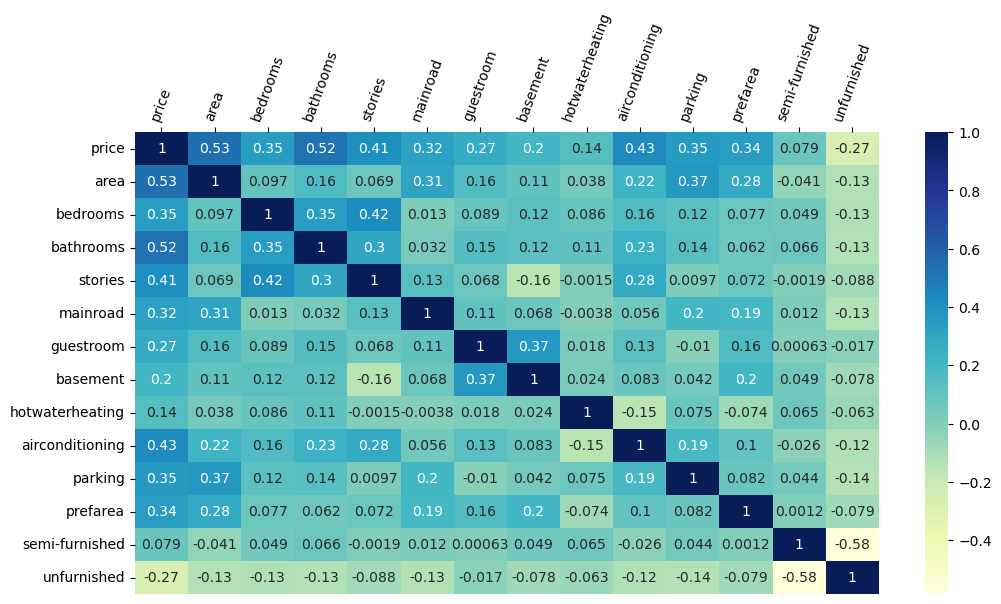

In [266]:
# Heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
ax.xaxis.tick_top()
plt.xticks(rotation=70)
plt.show()

In [268]:
# X_train, y_train (price)
y_train = df_train.pop('price')
X_train = df_train

In [270]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [273]:
# start with 'area' since it is highly co-related with tartget variable 'price'
X_train_sm = sm.add_constant(X_train['area'])

# create first model

lr_model_1 = sm.OLS(y_train, X_train_sm).fit()

lr_model_1.params

const    0.126894
area     0.462192
dtype: float64

In [275]:
# price = 0.126894 + 0.462192 * area

In [276]:
# print lr model summary
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 20 May 2023   Prob (F-statistic):           3.15e-29
Time:                        21:59:26   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

######  Checking significance of co-efficients.
   - Here, co-effiencent of intercept and area is approx 0 means these are significant
 ######  Here, value of r_squared is 0.28 means 28% variance in price is explained by area

In [279]:
# adding another variable bathrooms
# pass list of columns to DataFrame to get subset of it
X_train_sm = X_train[['area', 'bathrooms']] 

X_train_sm = sm.add_constant(X_train_sm)

# create second model
lr_model_2= sm.OLS(y_train, X_train_sm).fit()

# print lr model summary
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 20 May 2023   Prob (F-statistic):           2.51e-54
Time:                        22:20:07   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

**Observation: Even though ‘area’ is the most correlated variable, it could explain only 28% of the variance. 
After that, we added 'bathroom' as it had the second highest correlation with the target variable.
Then the model was able to explain 50% of the variance.**

In [280]:
# adding another variable bedrooms
# pass list of columns to DataFrame to get subset of it
X_train_sm = X_train[['area', 'bathrooms', 'bedrooms']] 

X_train_sm = sm.add_constant(X_train_sm)

# create third model
lr_model_3= sm.OLS(y_train, X_train_sm).fit()

# print lr model summary
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 20 May 2023   Prob (F-statistic):           3.12e-57
Time:                        22:24:40   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

In [284]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [285]:
# Build model using all variables
X_train_sm = sm.add_constant(X_train)

# create and fit fourth model using all independent features
lr_model_4= sm.OLS(y_train, X_train_sm).fit()

# print lr model summary
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 21 May 2023   Prob (F-statistic):           8.83e-83
Time:                        12:46:27   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [286]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [293]:
X_train.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0


In [297]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


###  Here, we can encounter below four situations:
 - **1. High p-value (less significant coefficent) and high VIF (highly multi-collinear)** - In this case remove the feature(s)
 - **2. High p-value (less significant coefficent) and low VIF (no multi-collinear)** - In this case remove the feature(s) haiving high p-value (less significant)
 - **3. Low p-value (significant coefficent) and high VIF (highly multi-collinear)** - In this case remove features after completing step-2
 - **4. Low p-value (significant coefficent) and low VIF (no multi-collinear)** - In this case retain the feature(s)

In [315]:
if ('semi-furnished' in X_train.columns):
    print('it is present')
else:
    print('no')


no


In [316]:
# Here semi-furnished's co-efficent having high p-value (less significance) and low VIF (non multi-collinear) and
# bedrooms's co-efficient having hight VIF (means highly co-related with other features) and lesss p-value ( significance)
# first remove the  semi-furnished feature

# Build model after dropping 'semi-furnished'
if ('semi-furnished' in X_train.columns):
    X_train = X_train.drop('semi-furnished', axis=1)

X_train_sm = sm.add_constant(X_train)

# create and fit 5th model
lr_model_5= sm.OLS(y_train, X_train_sm).fit()

# print lr model summary
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.07e-83
Time:                        13:40:36   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [302]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [317]:
# Build model after dropping 'bedrooms'
if ('bedrooms' in X_train.columns):
    X_train = X_train.drop('bedrooms', axis=1)

X_train_sm = sm.add_constant(X_train)

# create and fit 6th model
lr_model_6= sm.OLS(y_train, X_train_sm).fit()

# print lr model summary
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.73e-84
Time:                        13:43:02   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [318]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


**Elimination based on VIF**

Suppose the VIFs obtained for five different variables are as follows:

- X1	:   7.12
- X2	:   5.53
- X3	:   5.01
- X4	:   3.45
- X5	:  2.68
 

Assuming that you’re dropping variables only on the basis of VIF and a VIF > 5 is not acceptable, which of these variables will you definitely drop?


**X1**

✓ Correct
Feedback:
Correct. It is always advisable that **you drop variables one by one**. Now, this variable definitely has a high VIF and needs to be dropped. The other two variables X2 and X3 also have a VIF > 5, but it might happen that after you drop X1, their VIF values will drop. So never drop more than one variable at a time.

### 4. Resudual Analysis on trainng data

In [320]:
y_train_pred = lr_model_6.predict(X_train_sm)

In [321]:
y_train_pred.head()

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
dtype: float64

In [323]:
res = y_train  - y_train_pred
res.head()

359    0.060098
19     0.151316
159   -0.009238
35     0.032502
28     0.107532
dtype: float64

In [324]:
X_train.head()

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [326]:
import warnings
warnings.filterwarnings('ignore')

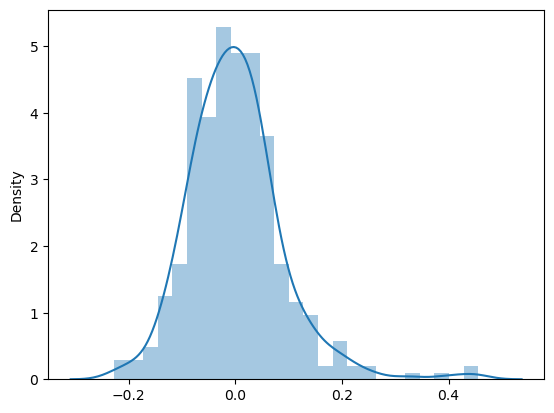

In [327]:
sns.distplot(res)
plt.show()

### 5. Prediction and evaluation of model on test data set
 - 1. we have to perform scalling on test data set
 - 2. Build the model to predict the target variable on test data set

In [329]:
df_test.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0


In [334]:
if not scaler:
    scaler2 = MinMaxScaler()
else:
    print('obj exist')

obj exist


In [338]:
df_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [339]:
scaler2 = MinMaxScaler()

# numerical variables

scale_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


# 2. transform the numerical features including target variable
df_test[scale_vars] = scaler2.fit_transform(df_test[scale_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0


In [353]:
df_test.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.245958,0.347561,0.105691,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.165518,0.245895,0.187387,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.128385,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.215636,0.333333,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.323196,0.333333,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [340]:
# create y_test and X_test for test data
y_test = df_test.pop('price')
X_test = df_test

In [342]:
print(y_test.shape)
print(X_test.shape)

(164,)
(164, 13)


In [345]:
# drop the features remove during model training/building
X_test = X_test.drop(['semi-furnished', 'bedrooms'], axis=1)

X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model_6.predict(X_test_sm)

In [346]:
test_res = y_test - y_test_pred
test_res.head()

265    0.044393
54     0.153169
171    0.024682
244   -0.034894
268    0.002093
dtype: float64

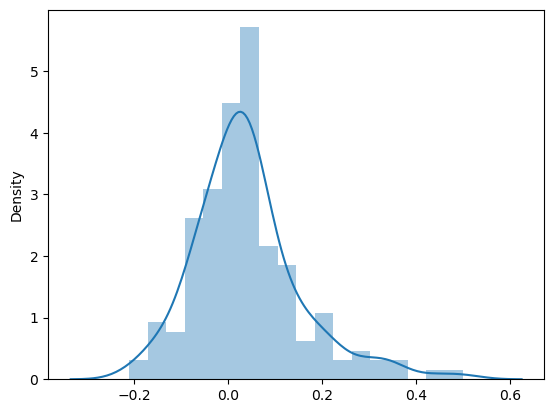

In [347]:
sns.distplot(test_res)
plt.show()

In [351]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [352]:
r2_score(y_true=y_test , y_pred= y_test_pred)

0.5943979682912514


### We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $

### 1. The mean of residuals is always equal to zero
  - **Feedback** - When a model gives you a “best fit” line, by design it is made such that the mean of all residuals is always zero.
    
### 2.  The sum of residuals is always equal to zero.  
  - **Feedback** - When a model gives you a “best fit” line, by design it is made such that the sum of all residuals is always zero.

In [362]:
# 1. The mean of residuals is always equal to zero
  # Feedback - When a model gives you a “best fit” line, by design it is made such that the mean of all residuals is always zero.
    
#2.  The sum of residuals is always equal to zero.  
  # Feedback - When a model gives you a “best fit” line, by design it is made such that the sum of all residuals is always zero.
    
    
print('.....Mean....')
print(res.mean())
print(test_res.mean())

print()
print('.....Median....')
print(res.median())
print(test_res.median())

print()
print('.....Sum....')
print(res.sum())
print(test_res.sum())

.....Mean....
-2.669926105807873e-16
0.03985716517338053

.....Median....
-0.005396098456697029
0.028049694212641835

.....Sum....
-1.0200174038743626e-13
6.536575088434404
